In [28]:
# General libraries
import pandas as pd
import numpy as np
import os

# NLP libraries
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
from unidecode import unidecode
from PIL import Image

# Geospatial analysis
import geopandas as gpd

# Visualization libraries
import matplotlib.pyplot as plt
import importlib
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive
from ipywidgets import IntSlider

# import utils files
import src.utils.data_utils as data_utils
import src.utils.geospatial_utils as geospatial_utils
import src.utils.nlp_utils as nlp_utils
importlib.reload(data_utils)
importlib.reload(nlp_utils)
importlib.reload(geospatial_utils)

DATA_FOLDER = "../data/"
output_folder = "website/_layouts/"


In [22]:
# User defined variables
USE_PREPROCESSED_DATA_CSV = True# Set to True to use preprocessed data file, False to preprocess data locally
USE_DOWNSAMPLED_DATA_CSV = False # Set to True to create a downsampled data file, False to create the file locally
USE_DOWNSAMPLED_DATA = False # Set to True to use the downsampled data, False to use the full data

# File paths
CLEANED_FID = DATA_FOLDER+'cleaned_ratings.csv'
PREPROCESSED_FID = DATA_FOLDER+'preprocessed_ratings.csv'
DOWNSAMPLED_FID = DATA_FOLDER+'downsampled_preprocessed_ratings.csv'

In [23]:
rawdata = pd.read_csv(CLEANED_FID, low_memory=False, encoding='utf-8')
if USE_PREPROCESSED_DATA_CSV:
    rawdata = pd.read_csv(PREPROCESSED_FID, low_memory=False)

    # Drop rows with Nan values in the 'preprocessed text' column
    rawdata = rawdata.dropna(subset=['preprocessed text'])
else:
    # Apply the preprocess_text function to execute text preprocessing steps
    rawdata['preprocessed text'] = rawdata['text'].apply(nlp_utils.preprocess_text)

    # Drop rows with Nan values in the 'preprocessed text' column
    rawdata = rawdata.dropna(subset=['preprocessed text'])

    # Save the preprocessed text to a new CSV file
    rawdata.to_csv(PREPROCESSED_FID, index=False)
    

In [24]:
import plotly.express as px
from plotly.io import write_html
style_mapping = data_utils.get_beer_style_mapping()
data = pd.DataFrame(list(style_mapping.items()), columns=['Beer Style', 'Category'])

# Prepare data for Sunburst Plot
fig = px.sunburst(
    data,
    path=['Category', 'Beer Style'],  # Hierarchy: Category > Beer Style
    values=None,  # Use equal weighting for each beer style
    color='Category',  # Color by category
    title='Beer Styles and Categories mapping',
)
fig.update_traces(
    hovertemplate='<b>%{label}</b><br>Category: %{parent}'
) #make the hover text more informative

# Customize layout
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))

output_file = "interactive_beer_mapping.html"
write_html(fig, file=output_folder+output_file, full_html=True)


# Display the figure (optional in notebook)
#fig.show()

In [29]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.io import write_html
from PIL import Image


df_england=rawdata[rawdata['country_user']=='England']


# Create word clouds for all beer styles and store their image arrays
styles = df_england['style_category'].unique()
styles = styles[styles != 'Other']


wordcloud_images = {}
for style in styles:
    text = df_england[df_england['style_category'] == style]['preprocessed text']
    wordcloud_images[style] = nlp_utils.plot_wordcloud(text)

# Create the base figure with the first beer type
initial_style = styles[0]
fig = go.Figure()

fig.add_trace(go.Image(z=wordcloud_images[initial_style]))

# Add dropdown to switch between beer styles
dropdown_buttons = []
for style in styles:
    dropdown_buttons.append({
        'label': style,
        'method': 'update',
        'args': [{'z': [wordcloud_images[style]]},  # Update the image
                 {'title': f'Wordcloud for {style}'}]  # Update the title
    })

# Update layout with dropdown and title
fig.update_layout(
    title=f'Wordcloud for {initial_style}',
    width=1000,
    height=500,
    xaxis=dict(visible=False),
    yaxis=dict(visible=False),
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'showactive': True,
        'x': 0.5,
        'xanchor': 'center',
        'y': 1.1,
        'yanchor': 'top'
    }],
    margin=dict(l=0, r=0, t=15, b=0)
)

# Save the interactive plot as an HTML file
output_file = "interactive_wordclouds.html"
write_html(fig, file=output_folder+output_file, full_html=True)
print(f"Interactive wordcloud saved as {output_file}")

# Display the figure (optional in notebook)
#fig.show()
"""


df_england=rawdata[rawdata['country_user']=='England']


# Create word clouds for all beer styles and store their image arrays
styles = df_england['style_category'].unique()
styles = styles[styles != 'Other']


wordcloud_images = {}
for style in styles:
    text = df_england[df_england['style_category'] == style]['preprocessed text']
    wordcloud_images[style] = nlp_utils.plot_wordcloud(" ".join(text))

# Create the base figure with the first beer type
initial_style = styles[0]
fig = go.Figure()

fig.add_trace(go.Image(z=wordcloud_images[initial_style]))

# Add dropdown to switch between beer styles
dropdown_buttons = []
for style in styles:
    dropdown_buttons.append({
        'label': style,
        'method': 'update',
        'args': [{'z': [wordcloud_images[style]]},  # Update the image
                 {'title': f'Wordcloud for {style}'}]  # Update the title
    })

# Update layout with dropdown and title
fig.update_layout(
    title=f'Wordcloud for {initial_style}',
    width=1000,
    height=500,
    xaxis=dict(visible=False),
    yaxis=dict(visible=False),
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'showactive': True,
        'x': 0.5,
        'xanchor': 'center',
        'y': 1.1,
        'yanchor': 'top'
    }],
    margin=dict(l=0, r=0, t=15, b=0)
)

# Save the interactive plot as an HTML file
output_file = "interactive_wordclouds.html"
write_html(fig, file=output_folder+output_file, full_html=True)
print(f"Interactive wordcloud saved as {output_file}")

# Display the figure (optional in notebook)
#fig.show()
"""

Interactive wordcloud saved as interactive_wordclouds.html


'\n\n\ndf_england=rawdata[rawdata[\'country_user\']==\'England\']\n\n\n# Create word clouds for all beer styles and store their image arrays\nstyles = df_england[\'style_category\'].unique()\nstyles = styles[styles != \'Other\']\n\n\nwordcloud_images = {}\nfor style in styles:\n    text = df_england[df_england[\'style_category\'] == style][\'preprocessed text\']\n    wordcloud_images[style] = nlp_utils.plot_wordcloud(" ".join(text))\n\n# Create the base figure with the first beer type\ninitial_style = styles[0]\nfig = go.Figure()\n\nfig.add_trace(go.Image(z=wordcloud_images[initial_style]))\n\n# Add dropdown to switch between beer styles\ndropdown_buttons = []\nfor style in styles:\n    dropdown_buttons.append({\n        \'label\': style,\n        \'method\': \'update\',\n        \'args\': [{\'z\': [wordcloud_images[style]]},  # Update the image\n                 {\'title\': f\'Wordcloud for {style}\'}]  # Update the title\n    })\n\n# Update layout with dropdown and title\nfig.update_

PermissionError: [Errno 13] Permission denied: 'C:\\canada_beer_ratings_distribution.png'

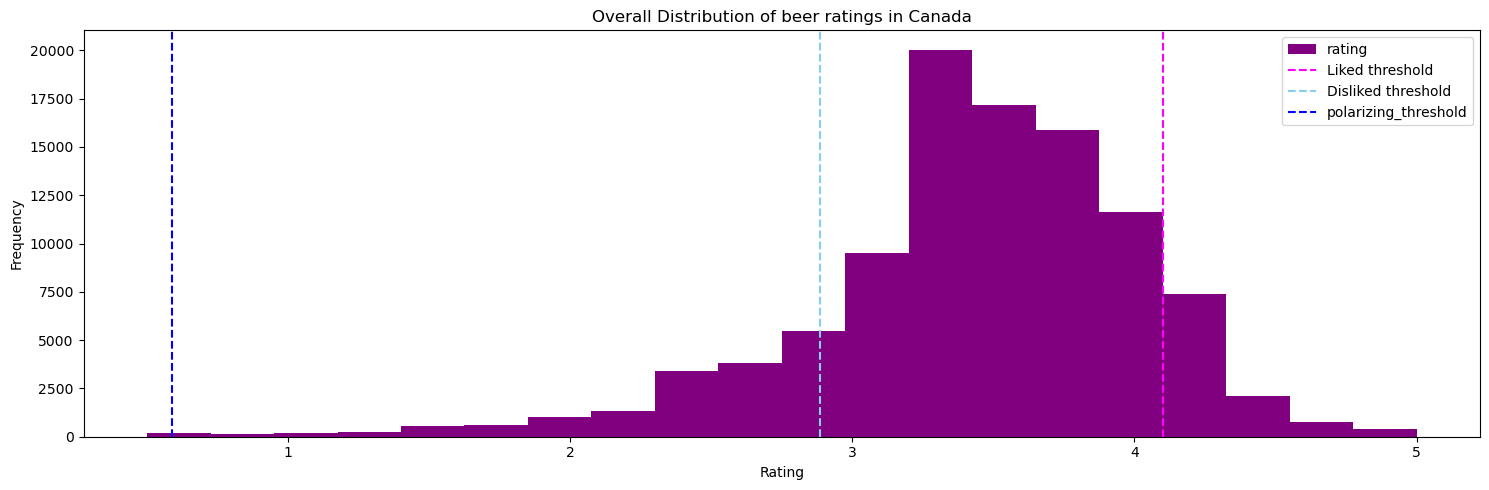

In [6]:
df = pd.read_csv(PREPROCESSED_FID, low_memory=False, encoding='utf-8')
sorted_ratings = df['rating'].sort_values()
sd = sorted_ratings.std()
avg = sorted_ratings.mean()
one_sigma = avg + sd
two_sigma = avg + 2 * sd
three_sigma = avg + 3 * sd
minus_one_sigma = avg - sd
minus_two_sigma = avg - 2 * sd
minus_three_sigma = avg - 3 * sd


# Add an average score, standard deviation and number of ratings column to the data frame for each beer
df['avg_score'] = df.groupby('beer_name')['rating'].transform('mean')
df['std_score'] = df.groupby('beer_name')['rating'].transform('std')
df['num_ratings'] = df.groupby('beer_name')['rating'].transform('count')

# Top 90% of standard deviation scores
too_high_std = df['std_score'].quantile(0.9)

#  Define each beer as liked, neutral, disliked and polarizing based on the thresholds
liked_threshold = one_sigma
disliked_threshold = minus_one_sigma
polarizing_threshold = too_high_std
significant_number_of_ratings = 2 # Minimum number of ratings to consider a beer

df['rating_label'] = df.apply(nlp_utils.apply_rating, axis=1, args=(liked_threshold, disliked_threshold, polarizing_threshold))
# Categorize the beers based on their ratings for every country
df = nlp_utils.calculate_ratings_by_country(df, significant_number_of_ratings,liked_threshold, disliked_threshold)

fig, axes = plt.subplots(1, 1, figsize=(15, 5)) 
df_canada=df[df['country_user']=='Canada']
df_canada['rating'].astype(float).plot(kind='hist', bins=20, ax=axes, color='purple')
axes.set_title('Overall Distribution of beer ratings in Canada')
axes.set_xlabel('Rating')
axes.set_ylabel('Frequency')
axes.axvline(one_sigma, color='magenta', linestyle='--', label='Liked threshold')
axes.axvline(minus_one_sigma, color='skyblue', linestyle='--', label='Disliked threshold')
axes.axvline(polarizing_threshold, color='b', linestyle='--', label='polarizing_threshold')
axes.legend()

plt.tight_layout()
# Save the figure as a PNG file
fig.savefig('/website/_layouts/canada_beer_ratings_distribution.png')



In [ ]:
#Find the top 5 most polarizing beers in Canada

df_canada = df[df['country_user'] == 'Canada']

top_5_polarizing_beers = df_canada[df_canada['rating_label']=='Polarizing'].sort_values(by='std_score',ascending=False)[0:5]
top_5_polarizing_beers



for i in range(5):
    print(f"Beer Name: {top_5_polarizing_beers.iloc[i]['beer_name']}")
    print(f"Rating: {top_5_polarizing_beers.iloc[i]['rating']}")
    print(f"Number of Ratings: {top_5_polarizing_beers.iloc[i]['num_ratings']}")
    print(f"Average Rating: {top_5_polarizing_beers.iloc[i]['avg_score']}")
    print(f"Standard Deviation: {top_5_polarizing_beers.iloc[i]['std_score']}")
    print(f"Text: {top_5_polarizing_beers.iloc[i]['preprocessed text']}")
    #nlp_utils.plot_wordcloud(top_5_polarizing_beers.iloc[i]['preprocessed text'])



Beer Name: Sputnik
Rating: 2.3
Number of Ratings: 81
Average Rating: 3.022222222222222
Standard Deviation: 1.2059094078744057
Text: yellow color hazy lemonade well shandy sweet citrusy gets drier bitter end shandy go search elsewhere
Beer Name: Boxer Watermelon
Rating: 1.89
Number of Ratings: 39
Average Rating: 1.5907692307692307
Standard Deviation: 1.0973326142955748
Text: 710ml poured pint 31713a clear light pink giant bubbles zero foam even dump center looks cooler watermelon jolly rancher chemicals sickly sweet smells cooler fake watermelon cheap mixed cheap coolers tastes pretty bad watery sticky heat jolly rancher pretty lousy perhaps quotbeersquot highlight crap ingredients cant pronounce knew getting still bought morbid curiosity worst ive im disappointed able buy coop minhas free zone see buy bulk dump sink save teen aged girls hardships process
Beer Name: Boxer Watermelon
Rating: 0.5
Number of Ratings: 39
Average Rating: 1.5907692307692307
Standard Deviation: 1.09733261429557

857615          Big Sky Kriek
31030                Cambodia
354472    ArcheoBirra Etrusca
996852      Black Noddy Lager
297985                 Enigma
Name: beer_name, dtype: object
Big Sky Kriek
Beer Name: Big Sky Kriek


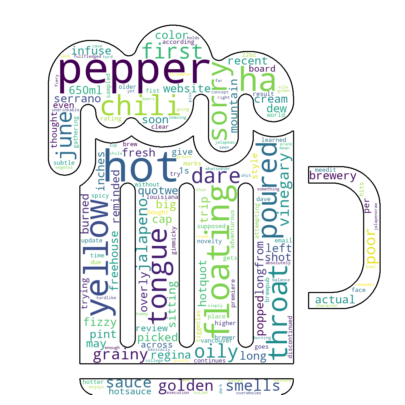

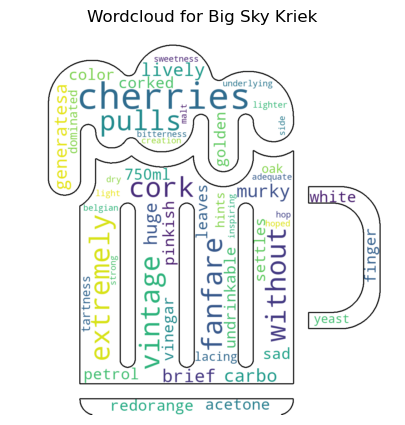

Cambodia
Beer Name: Cambodia


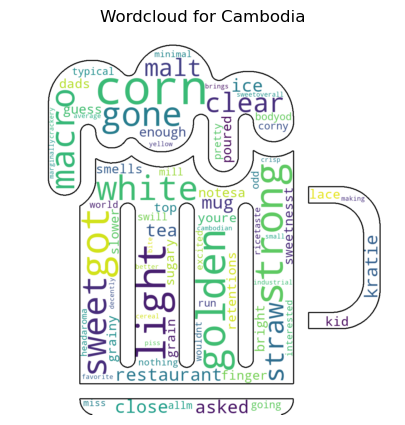

ArcheoBirra Etrusca
Beer Name: ArcheoBirra Etrusca


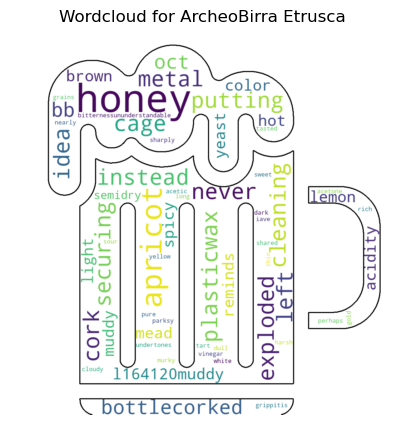

Black Noddy Lager
Beer Name: Black Noddy Lager


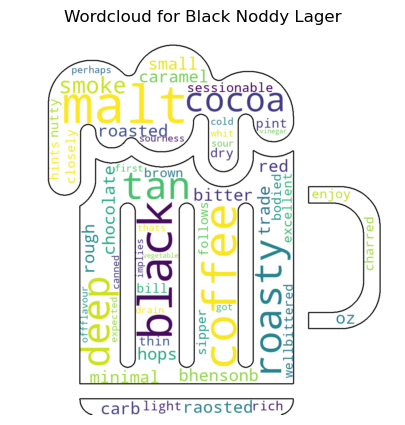

Enigma
Beer Name: Enigma


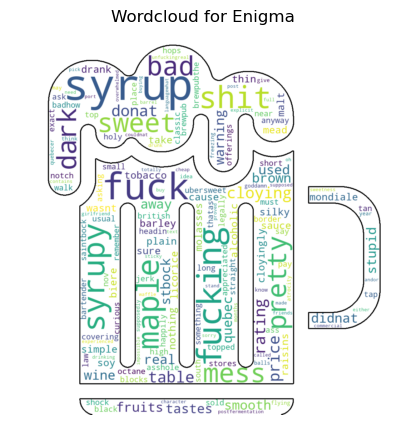

In [ ]:
#Option 1:  Plot the wordclouds for the top 5 polarizing beers for Canadians in the world 
top_5_polarizing_beers = df_canada[df_canada['rating_label']=='Polarizing'].sort_values(by='std_score_per_country',ascending=False)
top_5_polarizing_beers_names = top_5_polarizing_beers.drop_duplicates(subset='beer_name')['beer_name'].head(5)
print(top_5_polarizing_beers_names)
for beer_name in top_5_polarizing_beers_names:
    print(beer_name)
    #beer_name = top_5_polarizing_beers.iloc[i]['beer_name']
    text = top_5_polarizing_beers[top_5_polarizing_beers['beer_name']==beer_name]['preprocessed text']
    print(f"Beer Name: {beer_name}")
    nlp_utils.plot_wordcloud(text)
    plt.title(f"Wordcloud for {beer_name}")
    plt.show()



Interactive wordcloud saved as interactive_polarizing_wordclouds.html


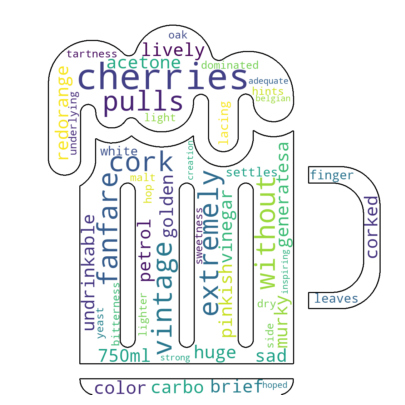

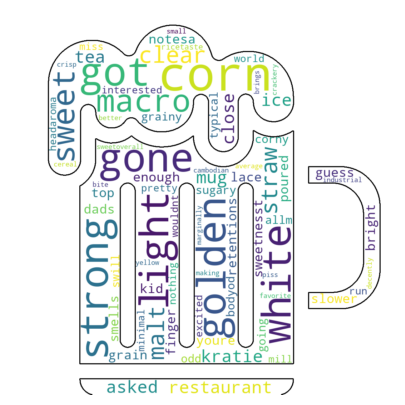

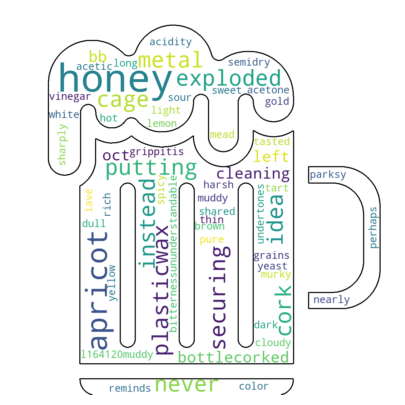

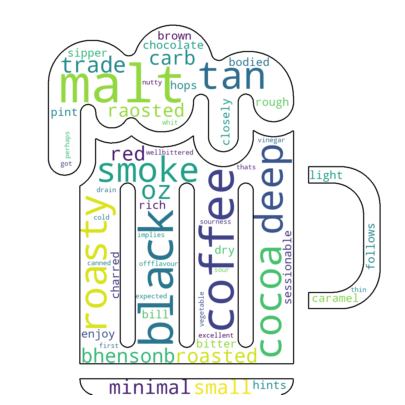

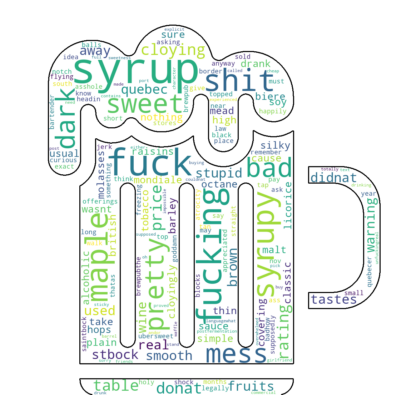

In [ ]:
from plotly.io import write_html

import plotly.graph_objects as go

# Get the top 5 polarizing beers for Canadians
top_5_polarizing_beers = df_canada[df_canada['rating_label'] == 'Polarizing'].sort_values(by='std_score_per_country', ascending=False)
top_5_polarizing_beers_names = top_5_polarizing_beers.drop_duplicates(subset='beer_name')['beer_name'].head(5)

# Create a dictionary to store wordcloud images
wordcloud_images = {}

# Generate wordclouds for the top 5 polarizing beers
for beer_name in top_5_polarizing_beers_names:
    text = top_5_polarizing_beers[top_5_polarizing_beers['beer_name'] == beer_name]['preprocessed text']
    wordcloud_images[beer_name] = nlp_utils.plot_wordcloud(text)

# Create the base figure with the first beer type
initial_beer = top_5_polarizing_beers_names.iloc[0]
fig = go.Figure()

fig.add_trace(go.Image(z=wordcloud_images[initial_beer]))

# Add dropdown to switch between beer styles
dropdown_buttons = []
for beer_name in top_5_polarizing_beers_names:
    dropdown_buttons.append({
        'label': beer_name,
        'method': 'update',
        'args': [{'z': [wordcloud_images[beer_name]]},  # Update the image
                 {'title': f'Wordcloud for {beer_name}'}]  # Update the title
    })

# Update layout with dropdown and title
fig.update_layout(
    title=f'Wordcloud for {initial_beer}',
    width=1000,
    height=500,
    xaxis=dict(visible=False),
    yaxis=dict(visible=False),
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'showactive': True,
        'x': 0.5,
        'xanchor': 'center',
        'y': 1.1,
        'yanchor': 'top'
    }],
    margin=dict(l=0, r=0, t=15, b=0)
)

# Save the interactive plot as an HTML file
output_file = "interactive_polarizing_wordclouds.html"
write_html(fig, file=output_file, full_html=True)
print(f"Interactive wordcloud saved as {output_file}")

# Display the figure (optional in notebook)
# fig.show()




Interactive wordcloud saved as interactive_polarizing_wordclouds_canadian_beers.html


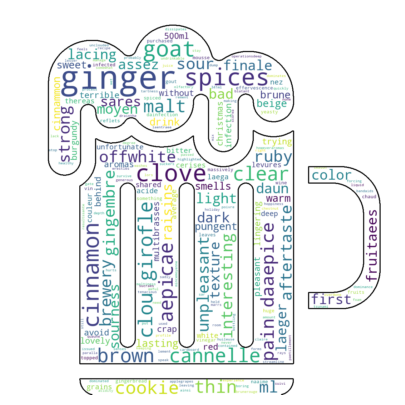

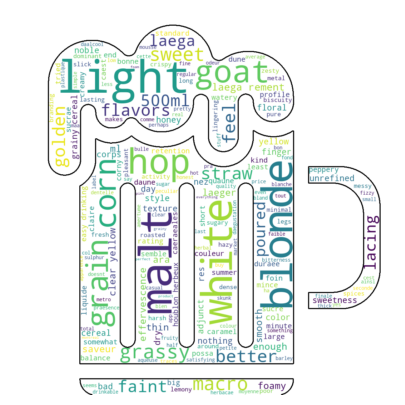

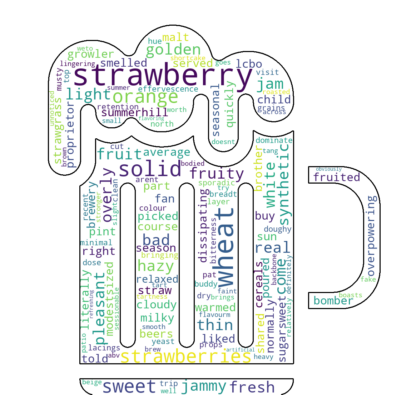

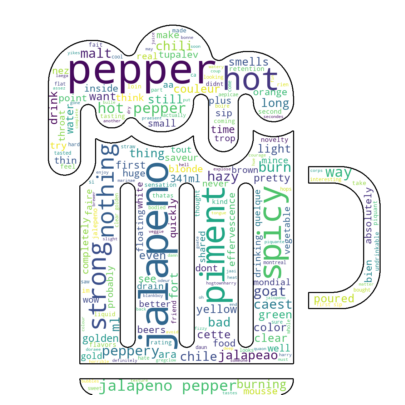

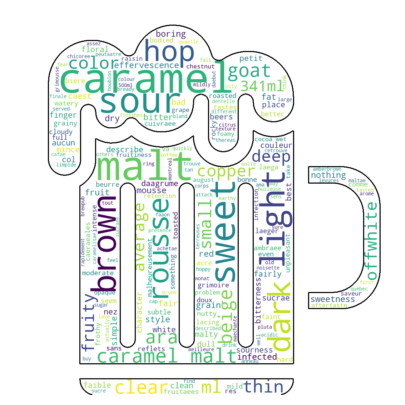

In [ ]:
#option 2 : Plot the wordclouds for the top 5 polarizing beers for Canadians for canadian beers
df_canada_beers_people = df[df['country_user'] == 'Canada']
df_canada_beers_people = df_canada_beers_people[df_canada_beers_people['location_brewery'] == 'Canada']
df_canada_beers_people_polarizing = df_canada_beers_people[df_canada_beers_people['rating_label'] == 'Polarizing']
df_canada_beers_people_polarizing = df_canada_beers_people_polarizing.sort_values(by='std_score', ascending=False)

# Get the top 5 polarizing beers for Canadians
top_5_polarizing_beers_CA = df_canada_beers_people_polarizing
top_5_polarizing_beers_names_CA = top_5_polarizing_beers_CA.drop_duplicates(subset='beer_name')['beer_name'].head(5)

# Create a dictionary to store wordcloud images
wordcloud_images = {}

# Generate wordclouds for the top 5 polarizing beers
for beer_name in top_5_polarizing_beers_names_CA:
    text = top_5_polarizing_beers_CA[top_5_polarizing_beers_CA['beer_name'] == beer_name]['preprocessed text']
    wordcloud_images[beer_name] = nlp_utils.plot_wordcloud(text)

# Create the base figure with the first beer type
initial_beer = top_5_polarizing_beers_names_CA.iloc[0]
fig = go.Figure()

fig.add_trace(go.Image(z=wordcloud_images[initial_beer]))

# Add dropdown to switch between beer styles
dropdown_buttons = []
for beer_name in top_5_polarizing_beers_names_CA:
    dropdown_buttons.append({
        'label': beer_name,
        'method': 'update',
        'args': [{'z': [wordcloud_images[beer_name]]},  # Update the image
                 {'title': f'Wordcloud for {beer_name}'}]  # Update the title
    })

# Update layout with dropdown and title
fig.update_layout(
    title=f'Wordcloud for {initial_beer}',
    width=1000,
    height=500,
    xaxis=dict(visible=False),
    yaxis=dict(visible=False),
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'showactive': True,
        'x': 0.5,
        'xanchor': 'center',
        'y': 1.1,
        'yanchor': 'top'
    }],
    margin=dict(l=0, r=0, t=15, b=0)
)

# Save the interactive plot as an HTML file
output_file = "interactive_polarizing_wordclouds_canadian_beers.html"
write_html(fig, file=output_file, full_html=True)
print(f"Interactive wordcloud saved as {output_file}")

# Display the figure (optional in notebook)
# fig.show()





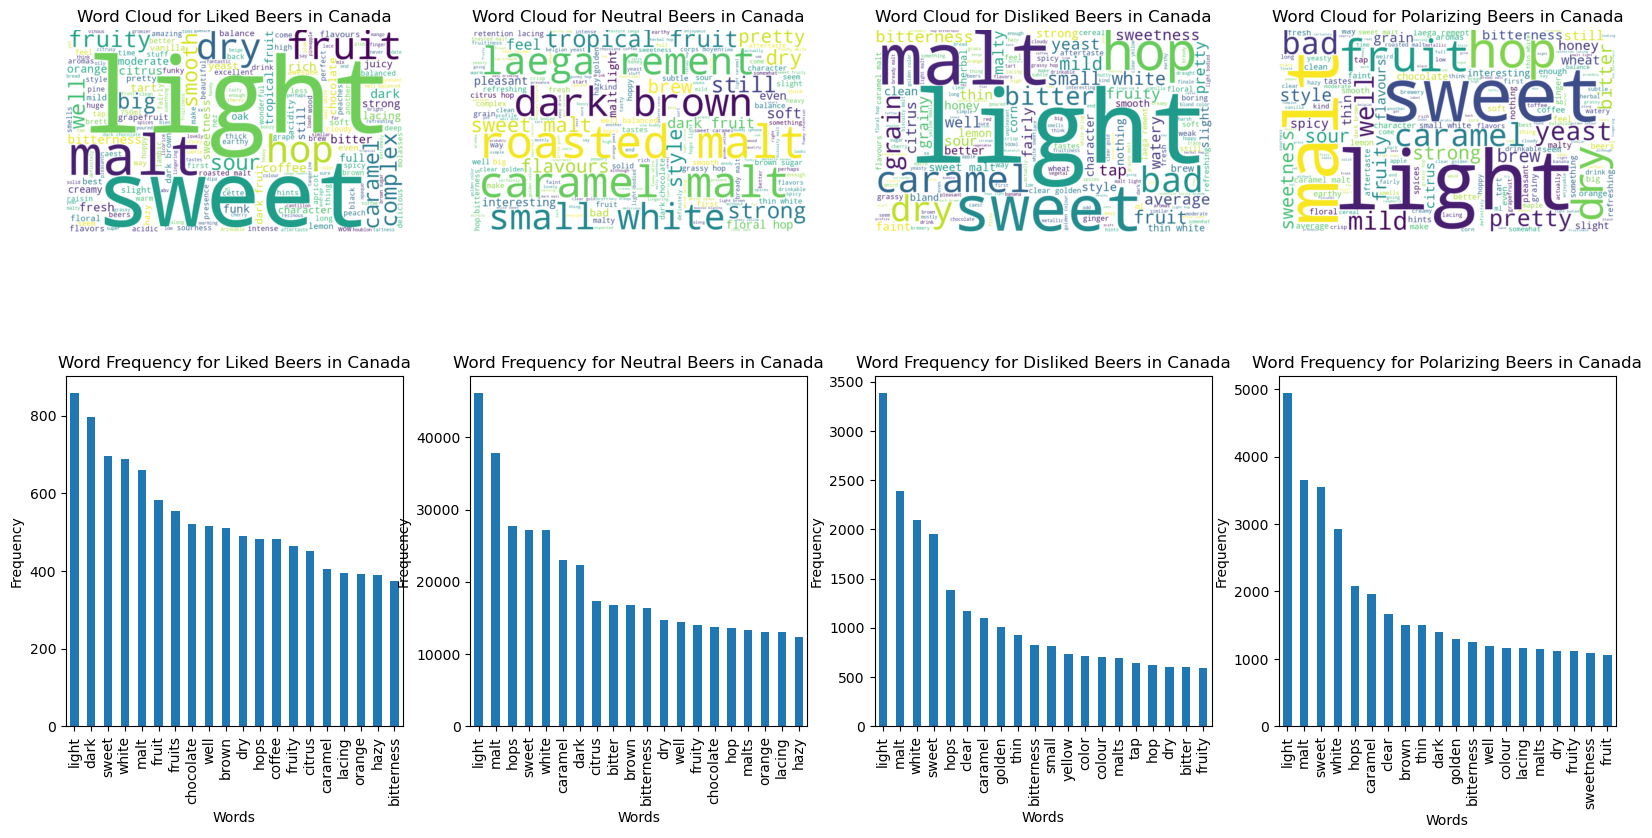

Interactive wordcloud saved as interactive_wordclouds_by_category_v2.html


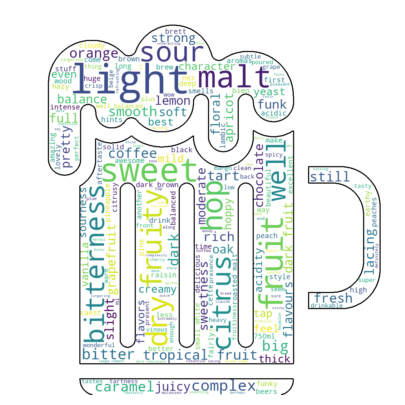

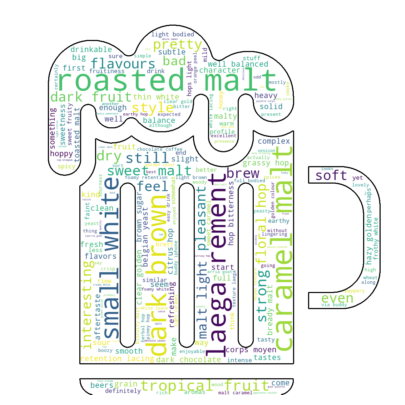

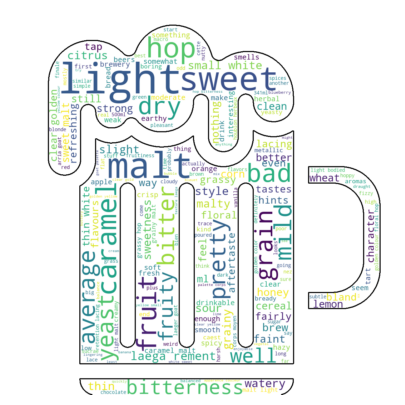

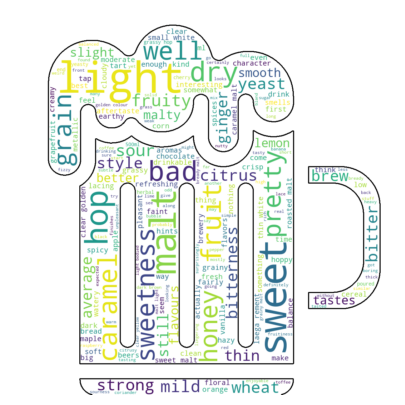

In [ ]:
from plotly.io import write_html

nlp_utils.plot_country_wordclouds(df, 'Canada')
import plotly.graph_objects as go

# Filter the data for Canada
df_canada = df[df['country_user'] == 'Canada']

# Define categories
categories = ['Liked', 'Neutral', 'Disliked', 'Polarizing']
# Create a dictionary to store wordcloud images for each category
wordcloud_images = {}

# Generate wordclouds for each category
for category in categories:
    text = df_canada[df_canada['rating_label'] == category]['preprocessed text'].dropna()
    wordcloud_images[category] = nlp_utils.plot_wordcloud(text)

# Create the base figure with the first category
initial_category = categories[0]
fig = go.Figure()

fig.add_trace(go.Image(z=wordcloud_images[initial_category]))

# Add dropdown to switch between categories
dropdown_buttons = []
for category in categories:
    dropdown_buttons.append({
        'label': category,
        'method': 'update',
        'args': [{'z': [wordcloud_images[category]]},  # Update the image
                 {'title': f'Wordcloud for {category} beers in Canada'}]  # Update the title
    })

# Update layout with dropdown and title
fig.update_layout(
    title=f'Wordcloud for {initial_category} beers in Canada',
    width=1000,
    height=500,
    xaxis=dict(visible=False),
    yaxis=dict(visible=False),
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'showactive': True,
        'x': 0.5,
        'xanchor': 'center',
        'y': 1.1,
        'yanchor': 'top'
    }],
    margin=dict(l=0, r=0, t=15, b=0)
)

# Save the interactive plot as an HTML file
output_file = "interactive_wordclouds_by_category_v2.html"
write_html(fig, file=output_file, full_html=True)
print(f"Interactive wordcloud saved as {output_file}")

# Display the figure (optional in notebook)
# fig.show()
